In [1]:
import os

In [2]:
cwd=os.getcwd()
BASE_DIR=os.path.dirname(cwd)
DATA_DIR=os.path.join(BASE_DIR,'data')
os.listdir(DATA_DIR)

['Testing.csv', 'Training.csv']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [4]:
from sklearn.svm import SVC

In [5]:
from sklearn.naive_bayes import GaussianNB

In [6]:
from scipy.stats import mode

In [7]:
my_file=os.path.join(DATA_DIR,'Training.csv')

In [9]:
data=pd.read_csv(my_file).dropna(axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Fungal infection'),
  Text(1, 0, 'Hepatitis C'),
  Text(2, 0, 'Hepatitis E'),
  Text(3, 0, 'Alcoholic hepatitis'),
  Text(4, 0, 'Tuberculosis'),
  Text(5, 0, 'Common Cold'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Dimorphic hemmorhoids(piles)'),
  Text(8, 0, 'Heart attack'),
  Text(9, 0, 'Varicose veins'),
  Text(10, 0, 'Hypothyroidism'),
  Text(11, 0, 'Hyperthyroidism'),
  Text(12, 0, 'Hypoglycemia'),
  Text(13, 0, 'Osteoarthristis'),
  Text(14, 0, 'Arthritis'),
  Text(15, 0, '(vertigo) Paroymsal  Positional Vertigo'),
  Text(16, 0, 'Acne'),
  Text(17, 0, 'Urinary tract infection'),
  Text(18, 0, 'Psoriasis'),
  Text(19, 0, 'Hepatitis D'),
  Text(20, 0, 'Hepatitis B'),
  Text(21, 0, 'Allergy'),
  Text(22, 0, 'hepatitis A'),
  Text(23, 0, 'GERD'),
  Text(24, 0, 'Chronic cholestasis'),

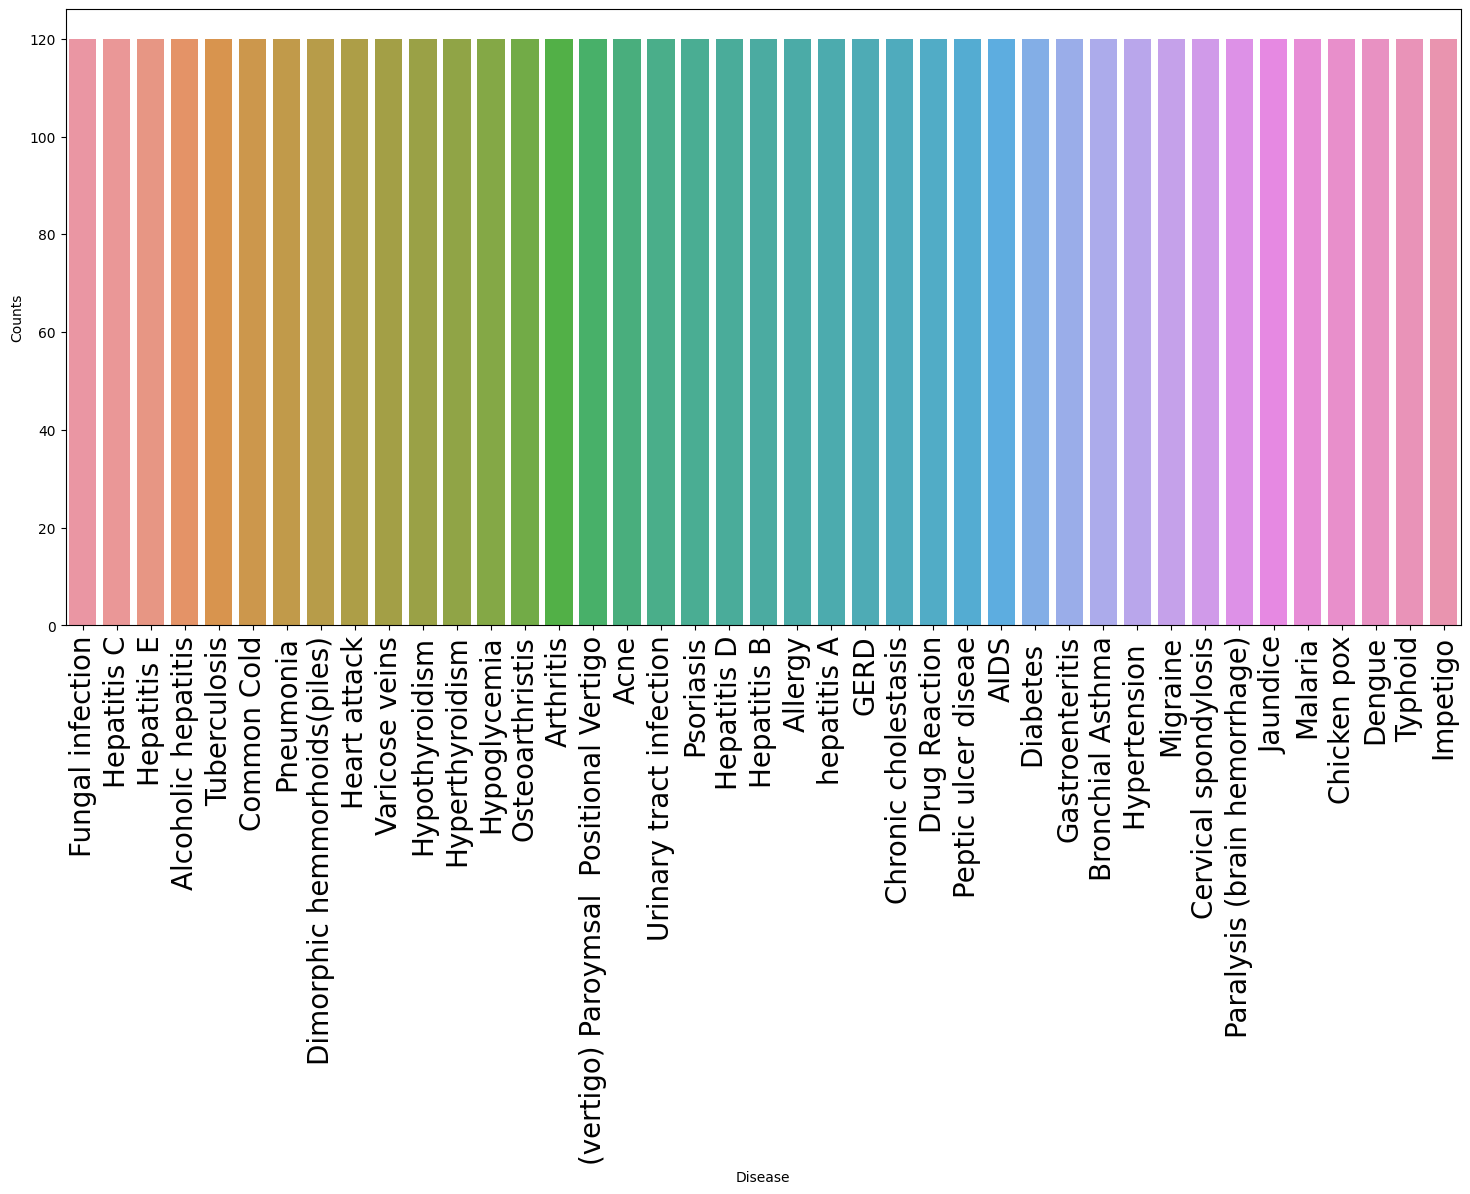

In [16]:
disease_counts=data['prognosis'].value_counts()
temp_df=pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts" : disease_counts.values
})
plt.figure(figsize=(18,8))
sns.barplot(x='Disease',y='Counts',data=temp_df)
plt.xticks(rotation=90,fontsize=20)

In [17]:
encoder=LabelEncoder()
data['prognosis']=encoder.fit_transform(data['prognosis'])

# split the data

In [26]:
X=data.iloc[:,:-1]
Y=data.iloc[:, -1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=24)
print(f"Train:{X_train.shape},{Y_train.shape}")
print(f"Test:{X_test.shape},{Y_test.shape}")
print(X.shape,X_train.shape,X_test.shape)

Train:(3936, 132),(3936,)
Test:(984, 132),(984,)
(4920, 132) (3936, 132) (984, 132)


# Model Building

In [27]:
def cv_scoring(estimstor,X,Y):
    return accuracy_score(Y,estimator.predict(X))

In [28]:
models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

In [29]:
for model_name in models:
    model = models[model_name]
    scores =cross_val_score(model,X,Y,cv=10,
                          n_jobs =-1,
                          scoring=cv_scoring)
    print("*"*20)
    print(model_name)
    print(f"score: {scores}")
    print(f"Mean_Score: {np.mean(scores)}")

********************
SVC
score: [nan nan nan nan nan nan nan nan nan nan]
Mean_Score: nan
********************
Gaussian NB
score: [nan nan nan nan nan nan nan nan nan nan]
Mean_Score: nan
********************
Random Forest
score: [nan nan nan nan nan nan nan nan nan nan]
Mean_Score: nan


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


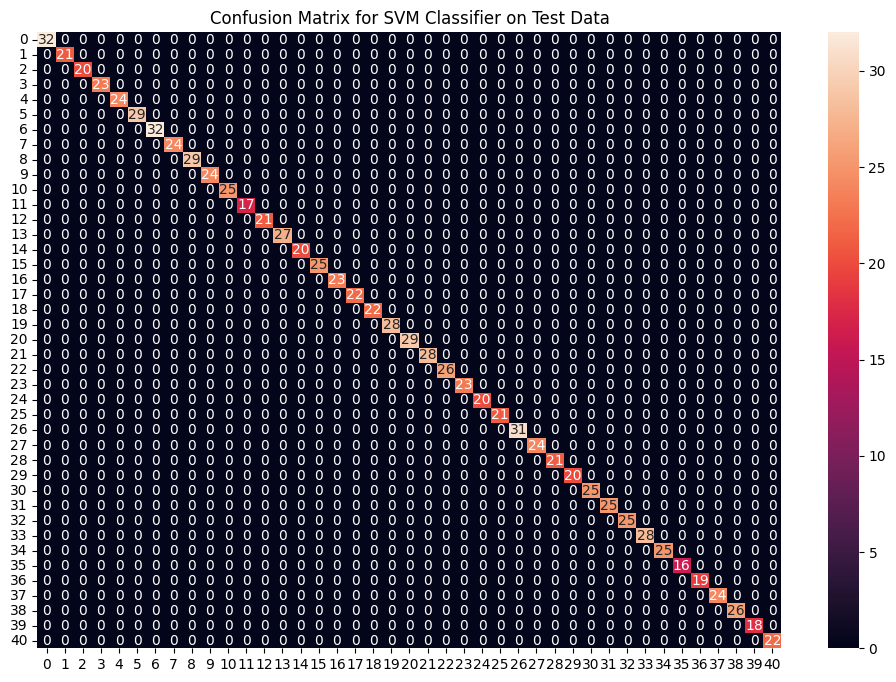

******************************
Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


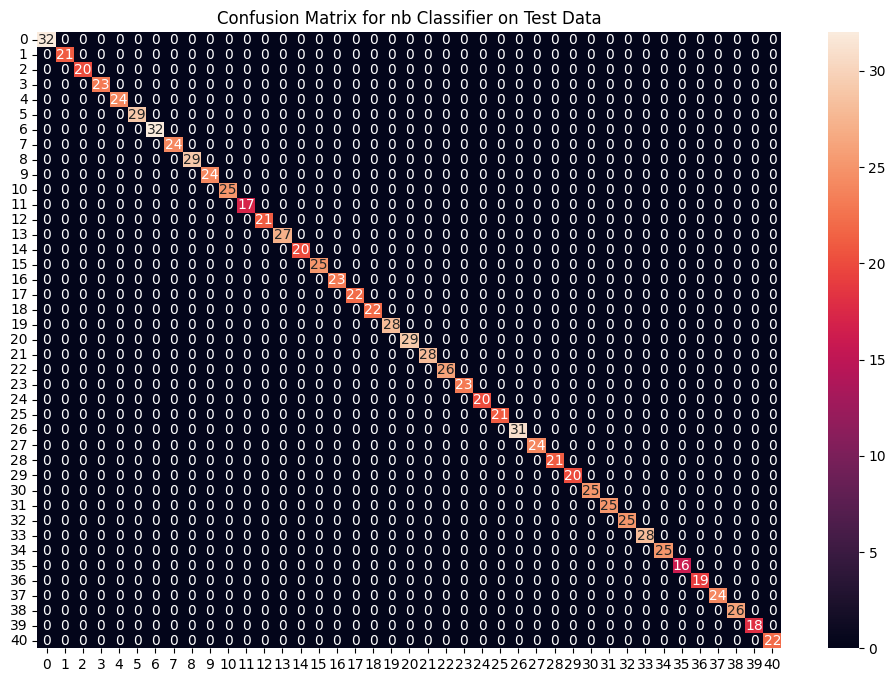

******************************
Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


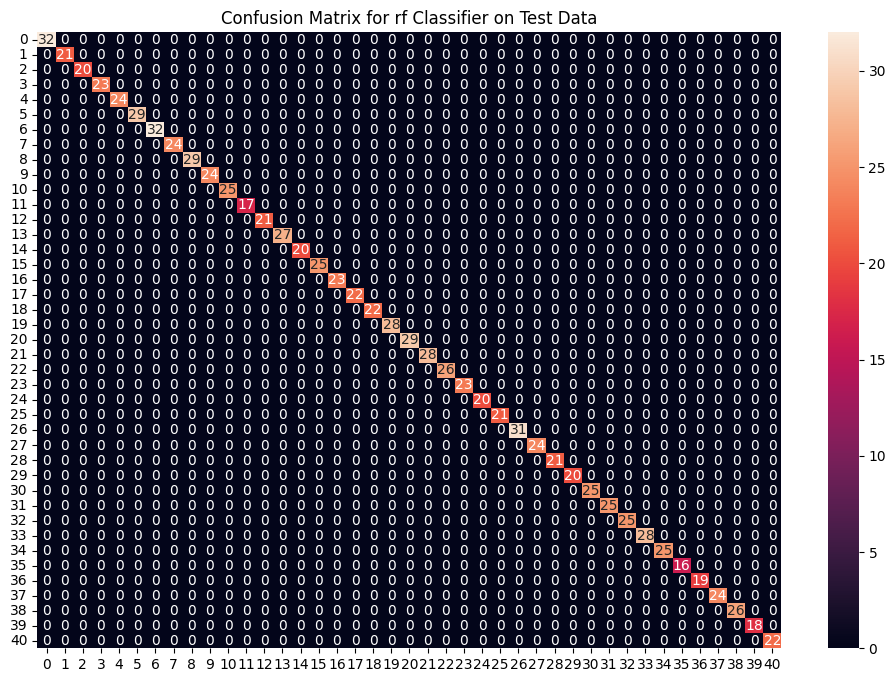

In [34]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)

preds = svm_model.predict(X_test)
 

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(Y_train, svm_model.predict(X_train))*100}")
 

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(Y_test, preds)*100}")

cf_matrix = confusion_matrix(Y_test, preds)

plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot=True)

plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

print('*'*30)

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

preds = nb_model.predict(X_test)
 

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(Y_train, nb_model.predict(X_train))*100}")
 

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(Y_test, preds)*100}")

cf_matrix = confusion_matrix(Y_test, preds)

plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot=True)

plt.title("Confusion Matrix for nb Classifier on Test Data")
plt.show()

print('*'*30)

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, Y_train)

preds = rf_model.predict(X_test)
 

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(Y_train, rf_model.predict(X_train))*100}")
 

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(Y_test, preds)*100}")

cf_matrix = confusion_matrix(Y_test, preds)

plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot=True)

plt.title("Confusion Matrix for rf Classifier on Test Data")
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_9312\1099855450.py:29: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [mode([i,j,k])[0][0] for i,j,


Accuracy on Test dataset by the combined model: 100.0


Text(0.5, 1.0, 'Confusion Matrix for Combined Model on Test Dataset')

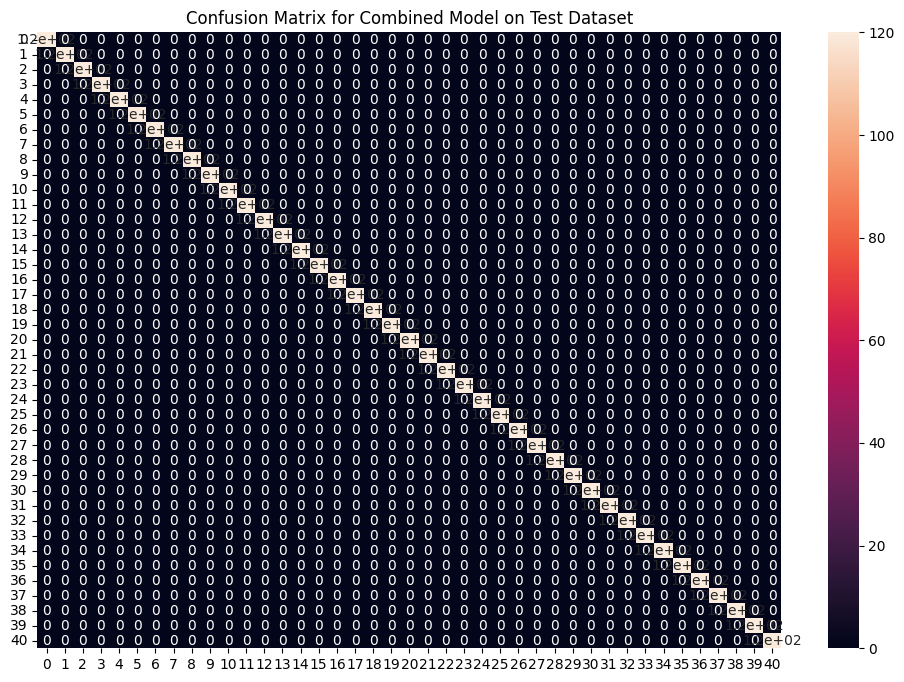

In [37]:
final_svm_model = SVC()

final_nb_model = GaussianNB()

final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, Y)
final_nb_model.fit(X, Y)
final_rf_model.fit(X, Y)
 
# Reading the test data

test_data = pd.read_csv(my_file).dropna(axis=1)
 

test_X = test_data.iloc[:, :-1]

test_Y = encoder.transform(test_data.iloc[:, -1])
 
# Making prediction by take mode of predictions 
# made by all the classifiers

svm_preds = final_svm_model.predict(test_X)

nb_preds = final_nb_model.predict(test_X)

rf_preds = final_rf_model.predict(test_X)
 

final_preds = [mode([i,j,k])[0][0] for i,j,

               k in zip(svm_preds, nb_preds, rf_preds)]
 

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")
 

cf_matrix = confusion_matrix(test_Y, final_preds)

plt.figure(figsize=(12,8))
 

sns.heatmap(cf_matrix, annot = True)

plt.title("Confusion Matrix for Combined Model on Test Dataset")


In [40]:
symptoms = X.columns.values
 
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form

symptom_index = {}

for index, value in enumerate(symptoms):

    symptom = " ".join([i.capitalize() for i in value.split("_")])

    symptom_index[symptom] = index
 

data_dict = {

    "symptom_index":symptom_index,

    "predictions_classes":encoder.classes_
}

def predictDisease(symptoms):

    symptoms = symptoms.split(",")

    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:

        index = data_dict["symptom_index"][symptom]

        input_data[index] = 1

         

    # reshaping the input data and converting it

    # into suitable format for model predictions

    input_data = np.array(input_data).reshape(1,-1)

     

    # generating individual outputs

    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]

    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]

    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

     

    # making final prediction by taking mode of all predictions

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]

    predictions = {

        "rf_model_prediction": rf_prediction,
 "naive_bayes_prediction": nb_prediction,

        "svm_model_prediction": nb_prediction,

        "final_prediction":final_prediction

    }

    return predictions
 
# Testing the function

print(predictDisease("Itching,Skin Rash"))


C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\moham\AppData\Local\Temp\ipykernel_9312\3788029484.py:55: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, 

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\moham\AppData\Local\Temp\ipykernel_9312\3788029484.py:55: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
